In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# Read in files and print the information
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

In [4]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2.0,31.0
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23.0,24.0
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9.0,70.0
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1.0,54.0
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17.0,68.0


In [5]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [6]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [7]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35791 entries, 0 to 35790
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jobId                35791 non-null  object 
 1   companyId            35790 non-null  object 
 2   jobType              35790 non-null  object 
 3   degree               35790 non-null  object 
 4   major                35790 non-null  object 
 5   industry             35790 non-null  object 
 6   yearsExperience      35790 non-null  float64
 7   milesFromMetropolis  35790 non-null  float64
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


In [8]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
train_feature_df.duplicated().sum()

0

In [11]:
train_target_df.duplicated().sum()

0

In [12]:
test_feature_df.duplicated().sum()

0

# Identify numerical and categorical variables

In [13]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [14]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

In [15]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

# Summarize numerical and categorical variables separately

In [16]:
train_feature_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,35790.000000,35790.000000
mean,11.901341,49.265298
std,7.217456,28.743955
min,0.000000,0.000000
25%,6.000000,24.000000
50%,12.000000,49.000000
75%,18.000000,74.000000
max,24.000000,99.000000


In [17]:
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,35791,35790,35790,35790,35790,35790
unique,35791,63,8,5,9,7
top,JOB1362684421399,COMP13,SENIOR,NONE,NONE,HEALTH
freq,1,612,4652,8589,19080,5173


# Merge features and targets into single df (optional: delete original dfs)

In [18]:
# Merge the features and salaries on jobId, delete original file to save memory
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35791 entries, 0 to 35790
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jobId                35791 non-null  object 
 1   companyId            35790 non-null  object 
 2   jobType              35790 non-null  object 
 3   degree               35790 non-null  object 
 4   major                35790 non-null  object 
 5   industry             35790 non-null  object 
 6   yearsExperience      35790 non-null  float64
 7   milesFromMetropolis  35790 non-null  float64
 8   salary               35791 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 2.7+ MB


In [20]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,163


# Visualize target variable (salary)

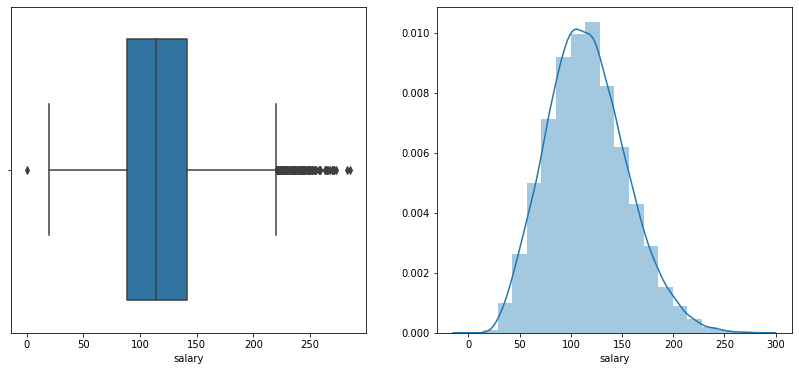

In [21]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

# Use IQR rule to identify potential outliers

In [42]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    35790.000000
mean       115.796396
std         38.656584
min         20.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        285.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


# Examine potential outliers

In [43]:
#check potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [44]:
#check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

145.874778    103
134.946007     50
134.929526     42
124.686731     17
95.738025       3
114.698939      2
105.539768      2
70.332291       0
Name: jobType, dtype: int64

In [25]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24.0,5.0,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24.0,3.0,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24.0,0.0,225


In [26]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > 8.5]

In [27]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

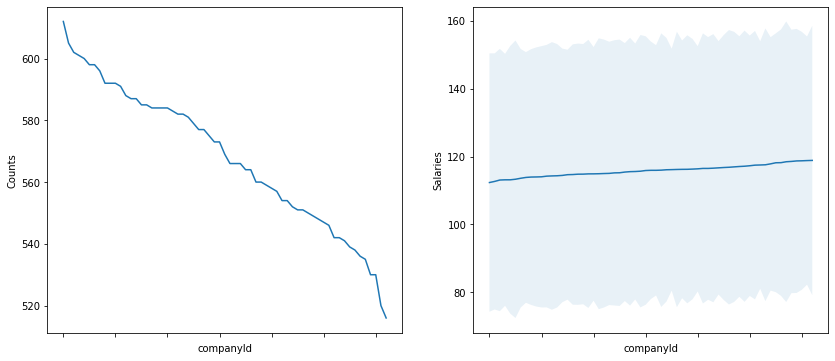

In [28]:
plot_feature(train_df, 'companyId')

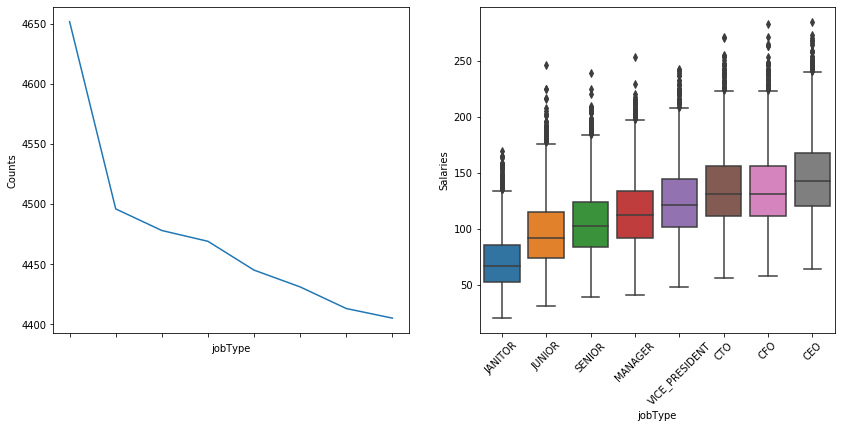

In [29]:
plot_feature(train_df, 'jobType')

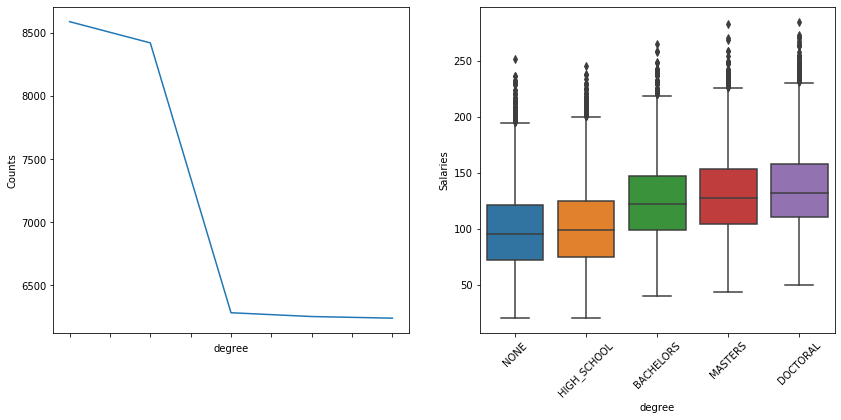

In [30]:
plot_feature(train_df, 'degree')

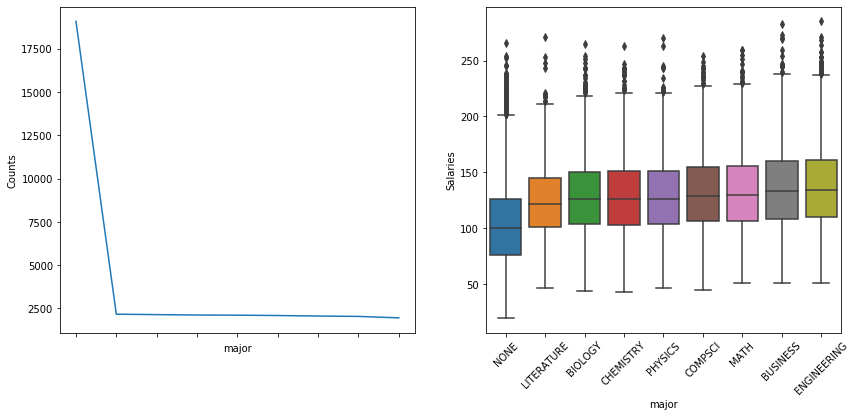

In [31]:
plot_feature(train_df, 'major')

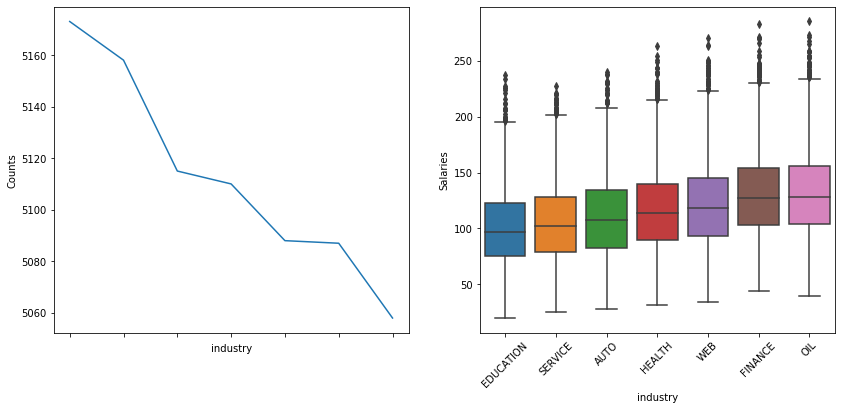

In [32]:
plot_feature(train_df, 'industry')

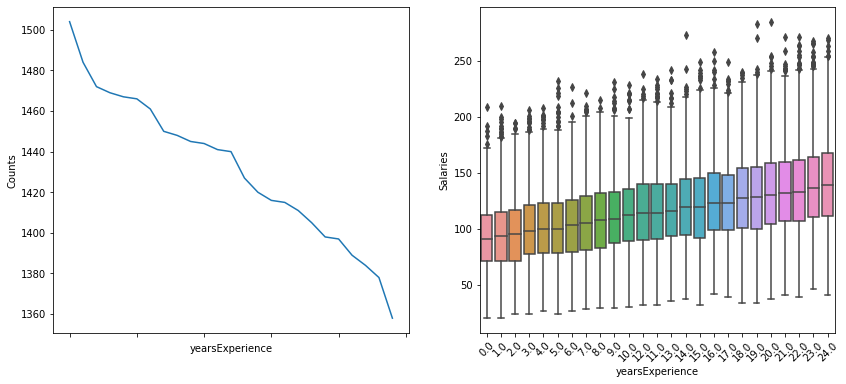

In [33]:
plot_feature(train_df, 'yearsExperience')

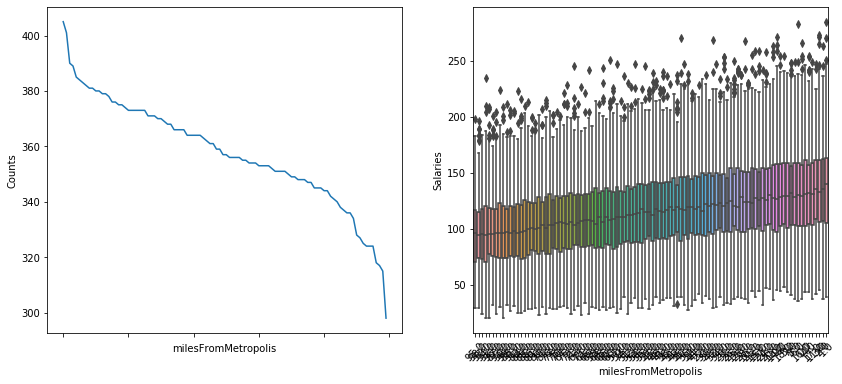

In [34]:
plot_feature(train_df, 'milesFromMetropolis')

In [35]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [36]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

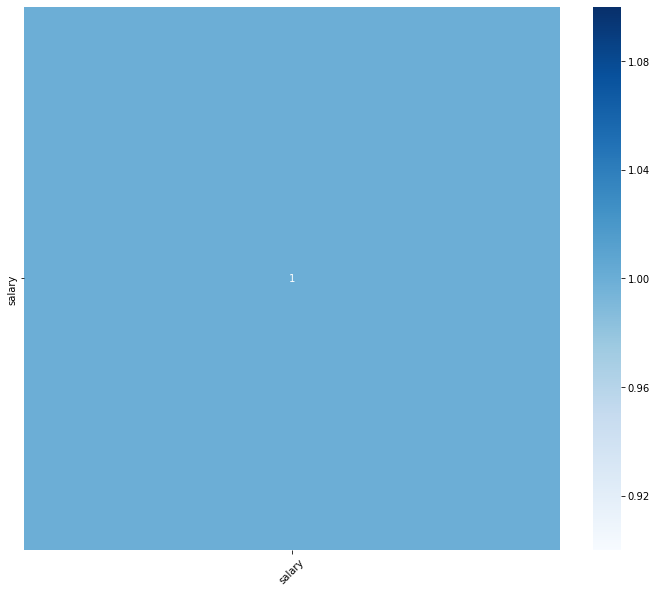

In [37]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()